In [1]:
import Pkg

Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Updating registry at `C:\Users\yancf\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\yancf\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\yancf\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [47]:
function getDataframes(method)

    df = Array{DataFrame}(undef,4)
    df[1] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/Intel(R) Core(TM) i5-7400 CPU @ 3.00GHz.csv"))
    df[4] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/AMD FX(tm)-8350 Eight-Core Processor.csv"))
    df[2] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz.csv"))
    df[3] = DataFrames.DataFrame(CSV.File("./src/data/" * method * "/IntelR_CoreTM_i5-7200U_CPU__2.50GHz.csv"))

    for dataframe in df
        dataframe[!, "KBytes"] = dataframe[!, "Length"] * 8 / 1024 # 8 Bytes -> 64 bits and 1024 B -> 1 KB
    end
    
    df
end

getDataframes (generic function with 1 method)

In [48]:
mergedf = getDataframes("mergesort")

4-element Array{DataFrame,1}:
 985×8 DataFrame
 Row │ Length  Elapsed Time  L1 Cache miss  L2 Cache miss  L3 Cache miss  Num  ⋯
     │ Int64   Float64       Int64          Int64          Int64          Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   2048         1.129           1737           2112            126       ⋯
   2 │   2176         1.189           1494           2000             18
   3 │   2304         1.279           1801           2086             55
   4 │   2432         1.42            1983           2316             64
   5 │   2560         1.436           1843           2139             58       ⋯
   6 │   2688         1.518           2154           2444             23
   7 │   2816         1.689           2552           2959             13
   8 │   2944         1.676           2488           2577             59
   9 │   3072         1.808           2787           2899             41       ⋯
  10 │   3200         1.838  

In [49]:
quickdf = getDataframes("quicksort")

4-element Array{DataFrame,1}:
 985×8 DataFrame
 Row │ Length  Elapsed Time  L1 Cache miss  L2 Cache miss  L3 Cache miss  Num  ⋯
     │ Int64   Float64       Int64          Int64          Int64          Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   2048         0.421            552            975             24       ⋯
   2 │   2176         0.495            667           1118             26
   3 │   2304         0.485            544           1007             22
   4 │   2432         0.506            581            975              6
   5 │   2560         0.637           1027           1512             30       ⋯
   6 │   2688         0.579            647           1057              6
   7 │   2816         0.636            682           1154             12
   8 │   2944         0.637            689           1124             13
   9 │   3072         0.673            680           1198             11       ⋯
  10 │   3200         0.706  

In [50]:
function GenericPlot(dfs::Array{DataFrame}, xlabel::String, ylabel::String, label::Array{String}, title::String)
    p = plot(dfs[1][!, xlabel], dfs[1][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[1], title = title, legend = :topleft) 

    for i = 2:length(dfs)
        plot!(dfs[i][!, xlabel], dfs[i][!, ylabel], xlabel=xlabel, ylabel=ylabel, label = label[i], legend = :topleft)
    end

    p
end

GenericPlot (generic function with 1 method)

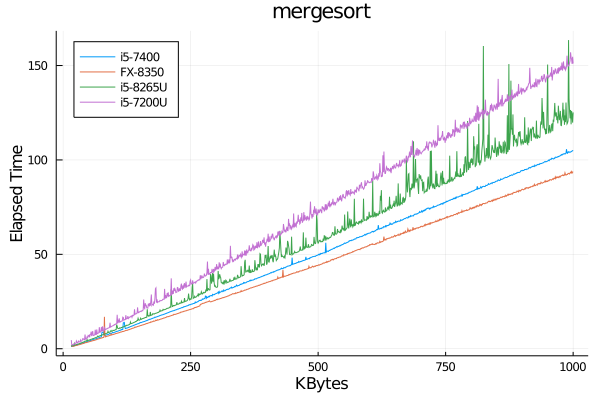

In [51]:
mTime = GenericPlot(mergedf, "KBytes", "Elapsed Time", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/ElapsedTimeMerge.png")

mTime

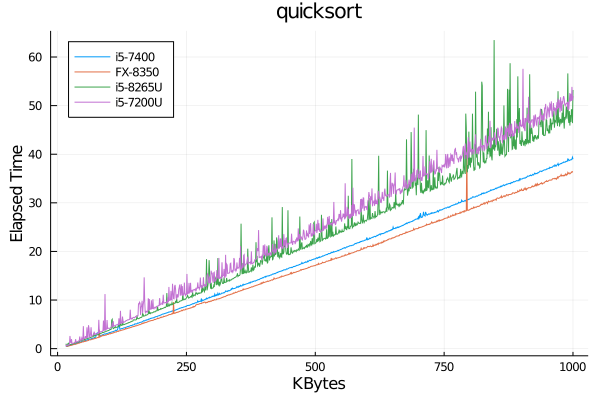

In [52]:
qTime = GenericPlot(quickdf, "KBytes", "Elapsed Time", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "quicksort")
savefig("graphs/ElapsedTimeQuick.png")

qTime

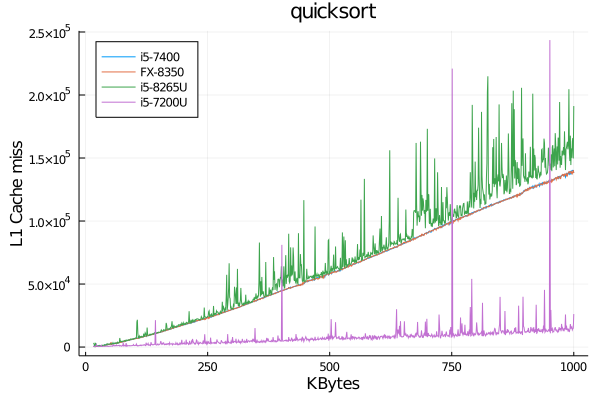

In [53]:
qL1 = GenericPlot(quickdf, "KBytes", "L1 Cache miss", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "quicksort")
savefig("graphs/L1Quick.png")

qL1

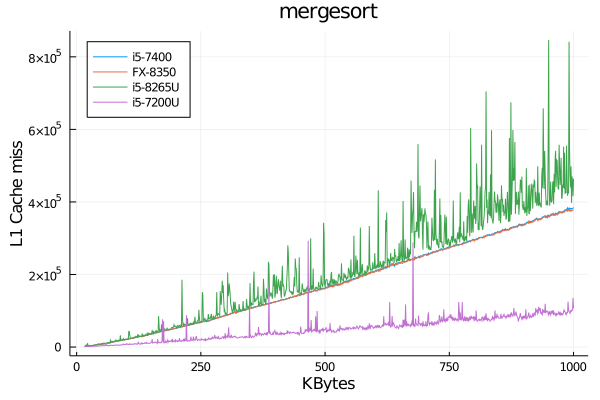

In [54]:
mL1 = GenericPlot(mergedf, "KBytes", "L1 Cache miss", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L1Merge.png")

mL1

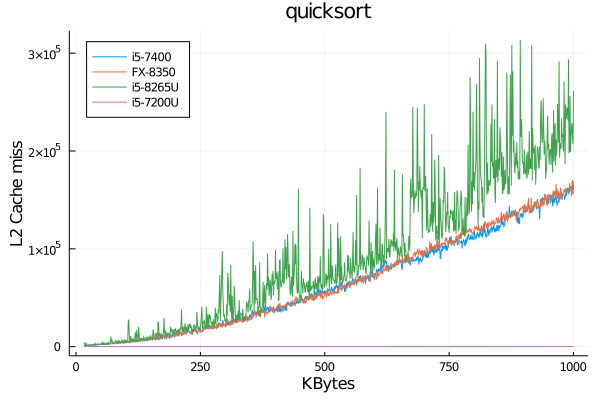

In [55]:
qL2 = GenericPlot(quickdf, "KBytes", "L2 Cache miss", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "quicksort")
savefig("graphs/L2Quick.png")

qL2

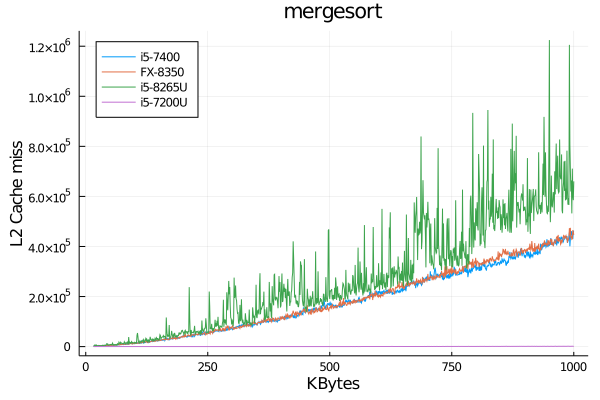

In [56]:
mL2 = GenericPlot(mergedf, "KBytes", "L2 Cache miss", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L2Merge.png")

mL2

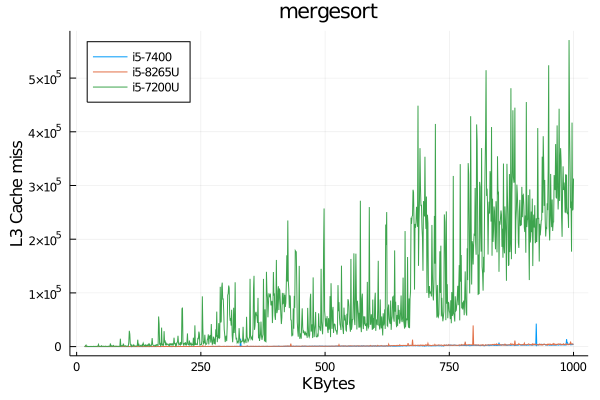

In [67]:
mL3 = GenericPlot(mergedf[1:3], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L3Merge1.png")

mL3

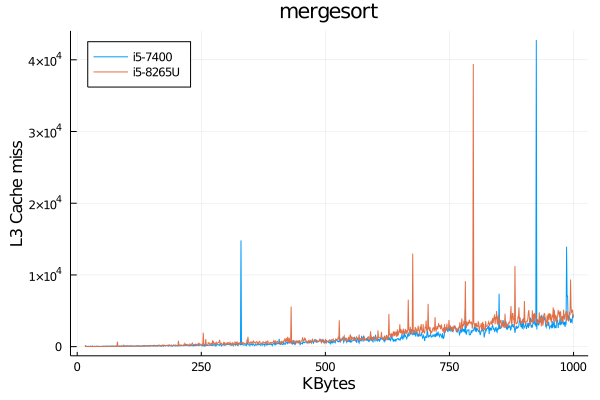

In [66]:
mL3 = GenericPlot(mergedf[1:2], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L3Merge2.png")

mL3

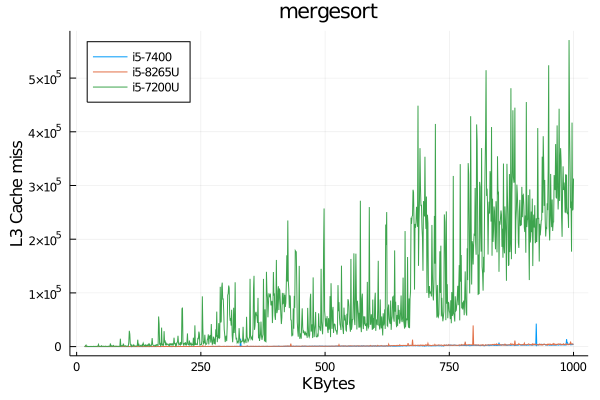

In [71]:
qL3 = GenericPlot(quickdf[1:3], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L3MergeGnomoInterfaceFoda.png")

mL3

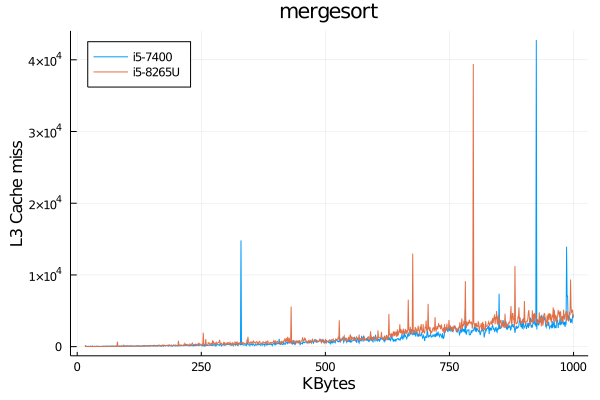

In [72]:
mL3 = GenericPlot(mergedf[1:2], "KBytes", "L3 Cache miss", ["i5-7400", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/L3Merge2.png")

mL3

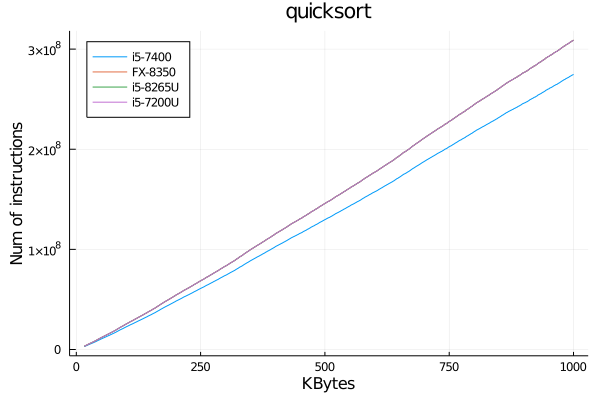

In [58]:
qN = GenericPlot(quickdf, "KBytes", "Num of instructions", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "quicksort")
savefig("graphs/NumQuick.png")

qN

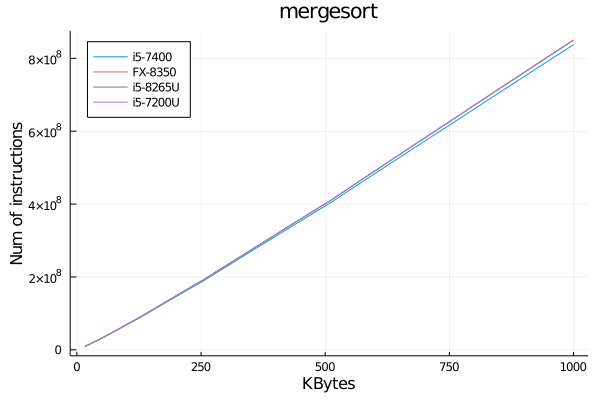

In [59]:
mN = GenericPlot(mergedf, "KBytes", "Num of instructions", ["i5-7400", "FX-8350", "i5-8265U", "i5-7200U"], "mergesort")
savefig("graphs/NumMerge.png")

mN

In [60]:
names(quickdf[1])

8-element Array{String,1}:
 "Length"
 "Elapsed Time"
 "L1 Cache miss"
 "L2 Cache miss"
 "L3 Cache miss"
 "Num of instructions"
 "Total cycles"
 "KBytes"